In [17]:
# Okay, here we will dive deeper into zinc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os

In [2]:

database_path = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_path)

with engine.connect() as conn:
  query_vc = 'SELECT * FROM vegetables_cooked'
  df_v_vc = pd.read_sql_query(query_vc, engine)

  query_vr = 'SELECT * FROM vegetables_raw'
  df_v_vr = pd.read_sql_query(query_vr, engine)

  query_fd = 'SELECT * FROM fruits_dried'
  df_v_fd = pd.read_sql_query(query_fd, engine)

  query_fr = 'SELECT * FROM fruits_raw'
  df_v_fr = pd.read_sql_query(query_fr, engine)


<Figure size 600x300 with 0 Axes>

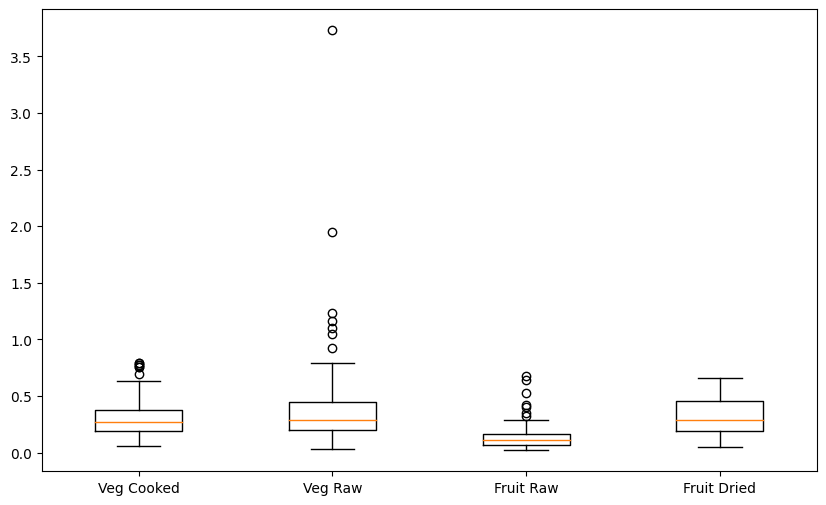

In [3]:

data = [df_v_vc['zn_in_mg'], df_v_vr['zn_in_mg'], df_v_fr['zn_in_mg'], df_v_fd['zn_in_mg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [4]:
top = df_v_vr[['long_desc', 'zn_mg_in_100kcal']].sort_values(by='zn_mg_in_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

top = df_v_vr[['long_desc', 'zn_in_mg']].sort_values(by="zn_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                            long_desc  zn_mg_in_100kcal
28                                        Endive, raw          4.647059
3                                  Bamboo shoots, raw          4.074074
0                        Alfalfa seeds, sprouted, raw          4.000000
54                            Seaweed, irishmoss, raw          3.979592
20                                Chayote, fruit, raw          3.894737
6                                  Broccoli raab, raw          3.500000
93                                Hearts of palm, raw          3.243478
56                                Seaweed, laver, raw          3.000000
55                                 Seaweed, kelp, raw          2.860465
2                                      Asparagus, raw          2.700000
82                                     Radicchio, raw          2.695652
57                                       Spinach, raw          2.304348
53                                 Seaweed, agar, raw          2

In [5]:
top = df_v_fr[['long_desc', 'zn_mg_in_100kcal']].sort_values(by='zn_mg_in_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

top = df_v_fr[['long_desc', 'zn_in_mg']].sort_values(by="zn_in_mg",ascending=False)
top_20_values = top.head(30)
print(top_30_values)

                                            long_desc  zn_mg_in_100kcal
9                                   Blackberries, raw          1.232558
54                                   Raspberries, raw          0.807692
33                            Melons, cantaloupe, raw          0.529412
55                                       Rhubarb, raw          0.476190
57                                  Strawberries, raw          0.437500
44                               Peaches, yellow, raw          0.435897
51                                  Pomegranates, raw          0.421687
4                                       Apricots, raw          0.416667
17                       Currants, red and white, raw          0.410714
6                           Avocados, raw, California          0.407186
5             Avocados, raw, all commercial varieties          0.400000
12                        Carambola, (starfruit), raw          0.387097
37                                    Nectarines, raw          0

<Figure size 600x300 with 0 Axes>

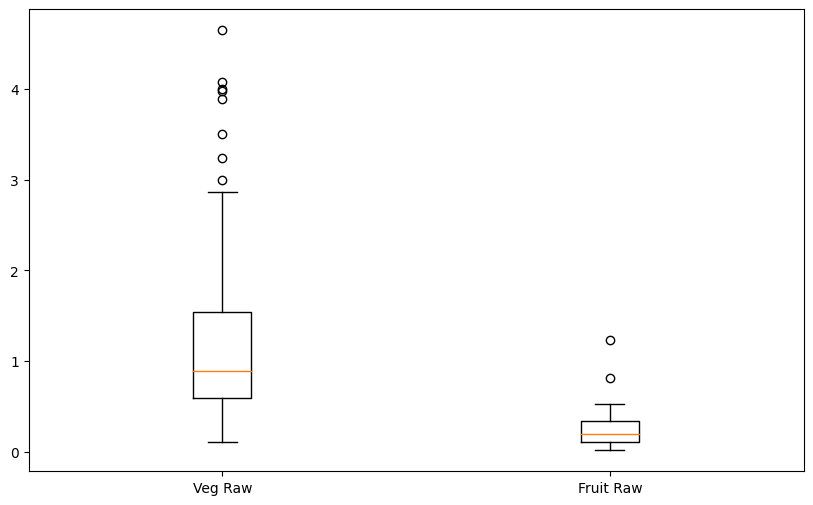

In [6]:
# Let's see how zinc content distributes between 100kcal of products:

data = [df_v_vr['zn_mg_in_100kcal'], df_v_fr['zn_mg_in_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()